In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft

In [22]:
sr = 4
T = 4
N = T*sr
Ts = 1/sr
t = np.arange(N) * Ts

dc = 5*np.ones(N)
comp1Hz = 2*np.cos(2*np.pi*1*t)
comp2Hz = 3*np.cos(2*np.pi*2*t)

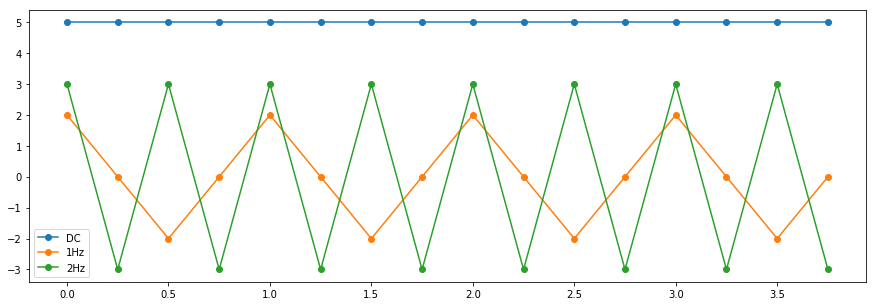

In [23]:
fig = plt.figure(figsize=(15,5))
ax = plt.subplot(111)

ax.plot(t, dc, '-o', label='DC')
ax.plot(t, comp1Hz, '-o', label='1Hz')
ax.plot(t, comp2Hz, '-o', label='2Hz')

ax.legend()

plt.show()

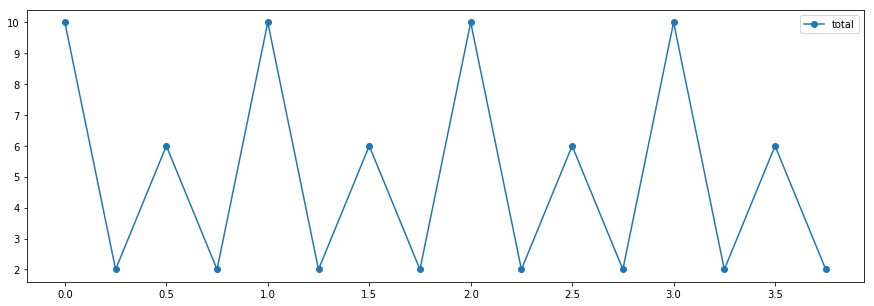

In [24]:
x = dc + comp1Hz + comp2Hz

fig = plt.figure(figsize=(15,5))
ax = plt.subplot(111)

ax.plot(t, x, '-o', label='total')

ax.legend()

plt.show()

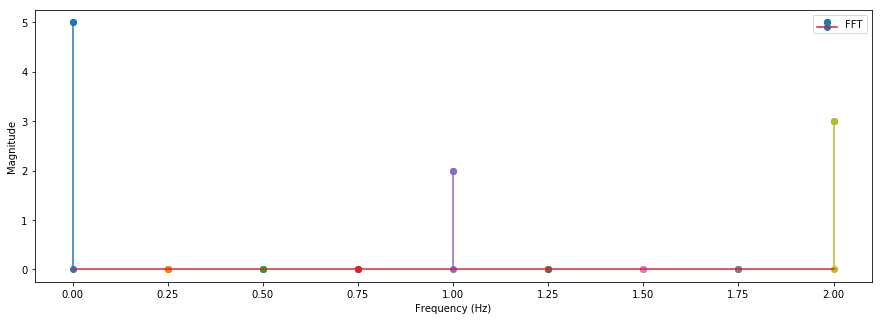

In [29]:
X = fft.fft(x)
X[1:N//2] = X[1:N//2] + X[-1:-N//2:-1]

fig = plt.figure(figsize=(15,5))
ax = plt.subplot(111)

ax.stem(np.arange(N//2+1)/N*sr, np.abs(X[:N//2+1])/N, '-o', label='FFT')

ax.set_ylabel('Magnitude')
ax.set_xlabel('Frequency (Hz)')
ax.legend()

plt.show()

In [30]:
from IPython.display import Audio
Audio('data/nightingale.wav')

In [34]:
import scipy.io.wavfile as wavfile
sr, y = wavfile.read('data/nightingale.wav')

In [35]:
print(y.shape, sr)

(338081, 2) 44100


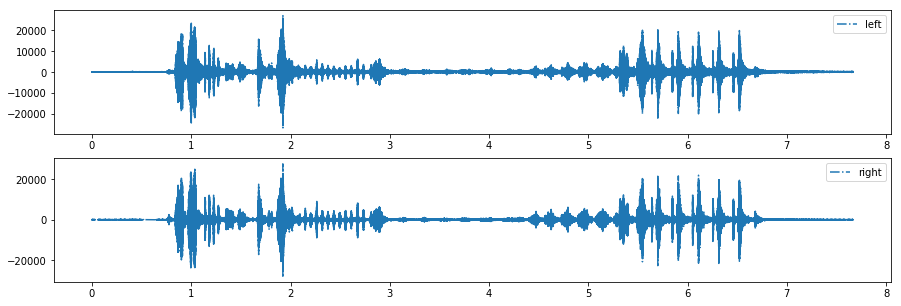

In [39]:
N = y.shape[0]
Ts = 1.0/(sr)
t = np.arange(N)*Ts
fig = plt.figure(figsize=(15,5))

ax = plt.subplot(211)

ax.plot(t, y[:,0], '-.', label='left')
ax.legend()

ax = plt.subplot(212)

ax.plot(t, y[:,1], '-.', label='right')
ax.legend()

plt.show()

In [41]:
from scipy.signal import stft



In [61]:
f, t, Z = stft(x=y[:,0], fs=sr, nperseg=1024, noverlap=900)


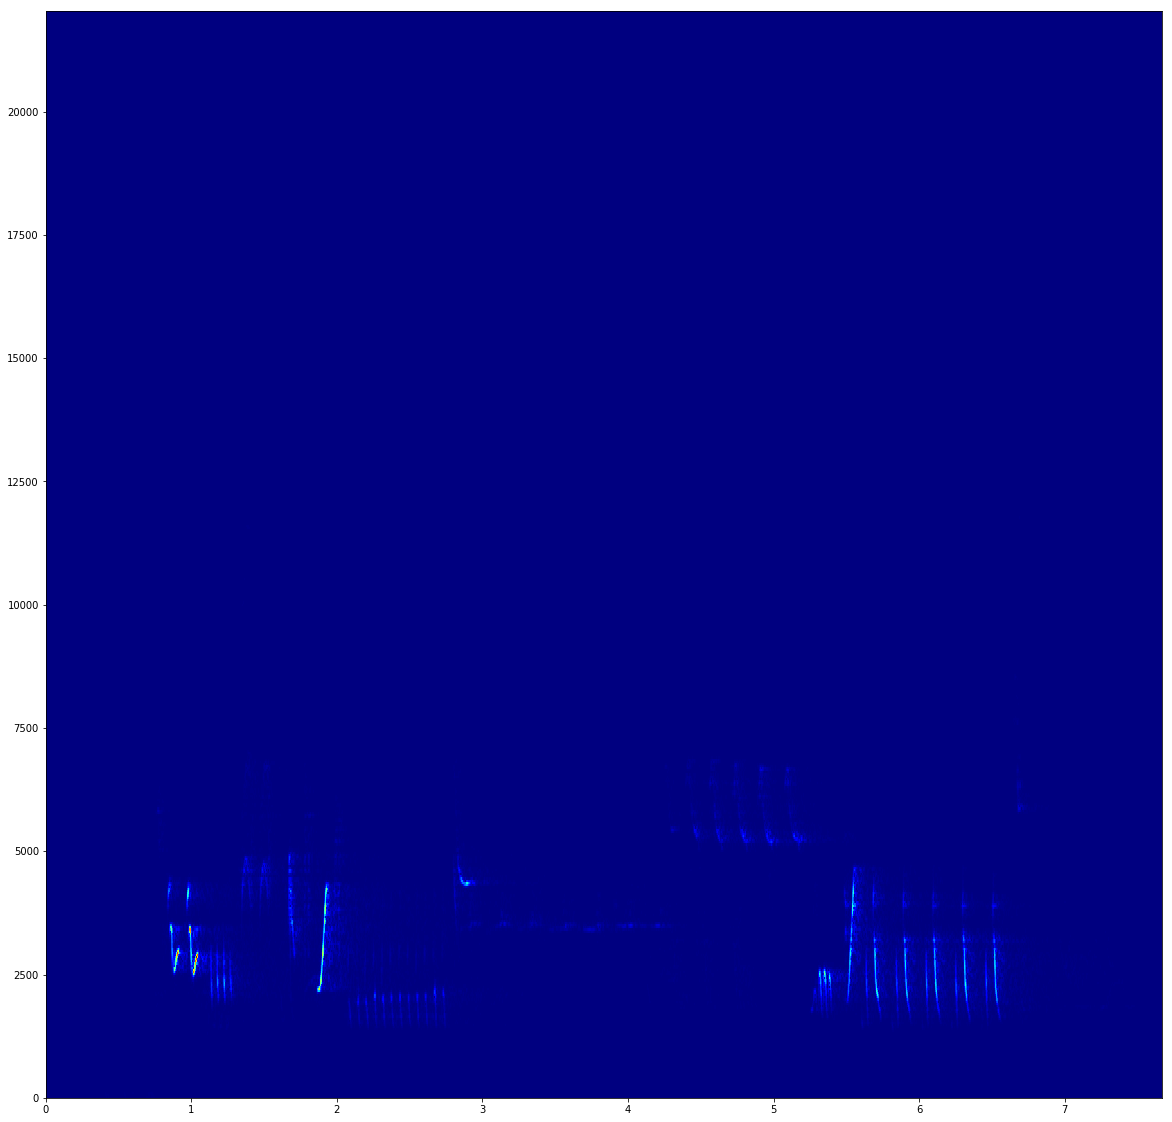

In [63]:
plt.figure(figsize=(20,20))
plt.pcolormesh(t, f, np.abs(Z), cmap='jet')
plt.show()

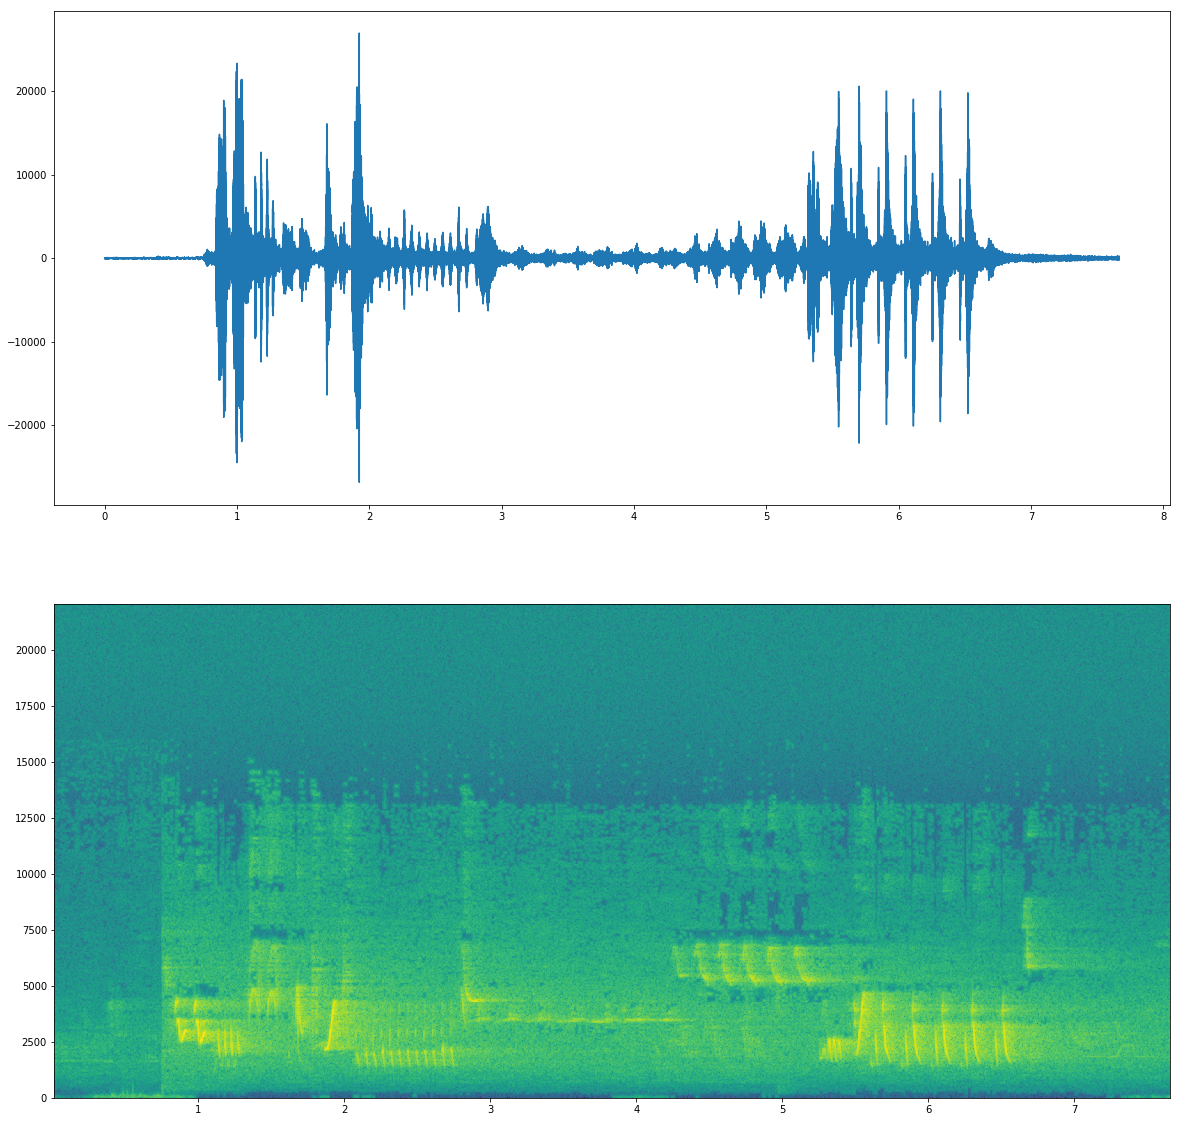

In [65]:
x = y[:,0]
fig = plt.figure(figsize=(20,20))
ax1 = plt.subplot(211)
ax1.plot(np.arange(N)*Ts, x)
ax2 = plt.subplot(212)
Pxx, freqs, bins, im = ax2.specgram(x, NFFT=1024, Fs=sr, noverlap=900)

In [66]:
sr = 44100
T = 2
N = T*sr
Ts = 1/sr
t = np.arange(N) * Ts

A4node = 1*np.cos(2*np.pi*440*t)

In [67]:
Audio(A4node,rate=sr)

In [82]:
note=np.array([261.626, 293.665, 329.628, 349.228, 391.995, 440, 493.883, 523.251])

def create_note(f, T, sr=44100):
    the_note = 1*np.cos(2*np.pi*f*np.arange(T*sr)/sr)
    return the_note

def create_music(note_and_T):
    f = 0.5
    note_map = {'C1': 0, 'D': 1, 'E': 2, 'F': 3, 'G': 4, 'A': 5, 'B': 6, 'C2': 7}
    notes = []
    for note_name, T in note_and_T:
        note_idx = note_map[note_name]
        the_note = create_note(note[note_idx], T*f)
        notes.append(the_note)
    return np.hstack(notes)

In [83]:
black = 0.5
Audio(create_music([
    ('C1', 1.0), ('D', 1.0), ('E', 1.0), ('C1', 1.0),
    ('C1', 1.0), ('D', 1.0), ('E', 1.0), ('C1', 1.0),
    ('E', 0.5), ('F', 0.5), ('G', 1.0), ('E', 0.5), ('F', 0.5), ('G', 1.0), 
]), rate=44100)